# Defining the plotting function

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_graphs(regret_greedy, regret_ucb1, regret_thompson, prob_best_arm_greedy, prob_best_arm_ucb1, prob_best_arm_thompson, n_iterations):

  # Plotting
  plt.figure(figsize=(15, 5))

  # Plot 1: Regret Over Time
  plt.subplot(1, 3, 1)
  plt.plot(regret_greedy, label='Greedy')
  plt.plot(regret_ucb1, label='UCB1')
  plt.plot(regret_thompson, label='Thompson Sampling')
  plt.xlabel('Iterations')
  plt.ylabel('Regret')
  plt.title('Regret Over Time')
  plt.legend()

  # Plot 2: Probability of Choosing the Best Arm Over Time
  plt.subplot(1, 3, 2)
  plt.plot(prob_best_arm_greedy, label='Greedy')
  plt.plot(prob_best_arm_ucb1, label='UCB1')
  plt.plot(prob_best_arm_thompson, label='Thompson Sampling')
  plt.xlabel('Iterations')
  plt.ylabel('Probability of Choosing Best Arm')
  plt.title('Best Arm Selection Probability')
  plt.legend()

  # Plot 3: Scatter Plot of Chosen Arms
  plt.subplot(1, 3, 3)
  plt.scatter(range(n_iterations), chosen_arms_greedy, alpha=0.5, label='Greedy')
  plt.scatter(range(n_iterations), chosen_arms_ucb1, alpha=0.5, label='UCB1')
  plt.scatter(range(n_iterations), chosen_arms_thompson, alpha=0.5, label='Thompson Sampling')
  plt.xlabel('Iterations')
  plt.ylabel('Chosen Arm')
  plt.title('Chosen Arms Over Iterations')
  plt.legend()

  plt.tight_layout()
  plt.show()

# Defining simulation

In [3]:
import numpy as np

def simulate(bandit, algorithm, n_iterations):
    # Initialize arrays to store the chosen arms and rewards for each iteration
    chosen_arms = np.zeros(n_iterations)
    rewards = np.zeros(n_iterations)

    # Simulate the bandit algorithm for the specified number of iterations
    for i in range(n_iterations):
        # Select an arm using the given algorithm
        arm = algorithm.select_arm()

        # Pull the chosen arm to receive a reward from the bandit
        reward = bandit.pull(arm)

        # Update the algorithm based on the chosen arm and the received reward
        algorithm.update(arm, reward)

        # Store the chosen arm and reward for later analysis
        chosen_arms[i] = arm
        rewards[i] = reward

    # Return the arrays containing chosen arms and rewards for each iteration
    return chosen_arms, rewards

# Pulling the arm

In [4]:
import numpy as np

class Bandit:
    def __init__(self, probabilities):
        # Initialize a Bernoulli Bandit with given probabilities for each arm
        self.probabilities = probabilities
        self.n_arms = len(probabilities)

    def pull(self, arm):
        # Simulate pulling the specified arm and check if the outcome is a success
        # Success occurs if the random number is less than the probability of the chosen arm
        return np.random.rand() < self.probabilities[arm]

# Defining Greedy, UCB1 and Thompson Sampling Functions

## Greedy

In [5]:
import numpy as np

class Greedy:
    def __init__(self, n_arms):
        self.counts = np.zeros(n_arms)  # Count of times each arm was played
        self.values = np.zeros(n_arms)  # Total reward of each arm

    def select_arm(self):
        # Select the arm with the highest average value; play each arm once first
        if 0 in self.counts:
            # Play each arm at least once
            return np.argmin(self.counts)
        else:
            # After playing each arm once, always select the arm with the highest average reward
            return np.argmax(self.values / self.counts)

    def update(self, chosen_arm, reward):
        # Update counts and values based on the chosen arm and the received reward
        self.counts[chosen_arm] += 1
        self.values[chosen_arm] += reward

## UCB1

In [6]:
import numpy as np

class UCB1:
    def __init__(self, n_arms):
        # Initialize the UCB1 algorithm with counts and values arrays for each arm
        self.counts = np.zeros(n_arms)  # Count of times each arm was played
        self.values = np.zeros(n_arms)  # Total reward of each arm

    def select_arm(self):
        # Select the arm using the UCB1 formula, balancing exploration and exploitation
        n_rounds = np.sum(self.counts)
        if 0 in self.counts:
            return np.argmin(self.counts)  # Play each arm at least once
        else:
            # Calculate the UCB values for each arm
            avg_reward = self.values / self.counts
            ucb_values = avg_reward + np.sqrt(2 * np.log(n_rounds) / self.counts)
            return np.argmax(ucb_values)

    def update(self, chosen_arm, reward):

        # Update counts and values based on the chosen arm and the received reward
        self.counts[chosen_arm] += 1
        self.values[chosen_arm] += reward

## Thompson Sampling

In [7]:
import numpy as np

class ThompsonSampling:
    def __init__(self, n_arms):
        # Initialize Thompson Sampling algorithm with arrays for successes (alpha) and failures (beta) for each arm
        self.alpha = np.ones(n_arms)  # Successes for each arm
        self.beta = np.ones(n_arms)   # Failures for each arm

    def select_arm(self):
        # Sample theta values from Beta distribution for each arm and choose the arm with the highest sampled value
        sampled_theta = np.random.beta(self.alpha, self.beta)
        return np.argmax(sampled_theta)

    def update(self, chosen_arm, reward):
        # Update successes and failures based on the chosen arm and the received reward
        if reward == 1:
            self.alpha[chosen_arm] += 1  # Increment successes for the chosen arm
        else:
            self.beta[chosen_arm] += 1   # Increment failures for the chosen arm

# Test Case 1: Eleven-armed bandit with probabilities 0, 0.1, 0.2, ..., 1.0

## 1,000 time steps

### Single Run

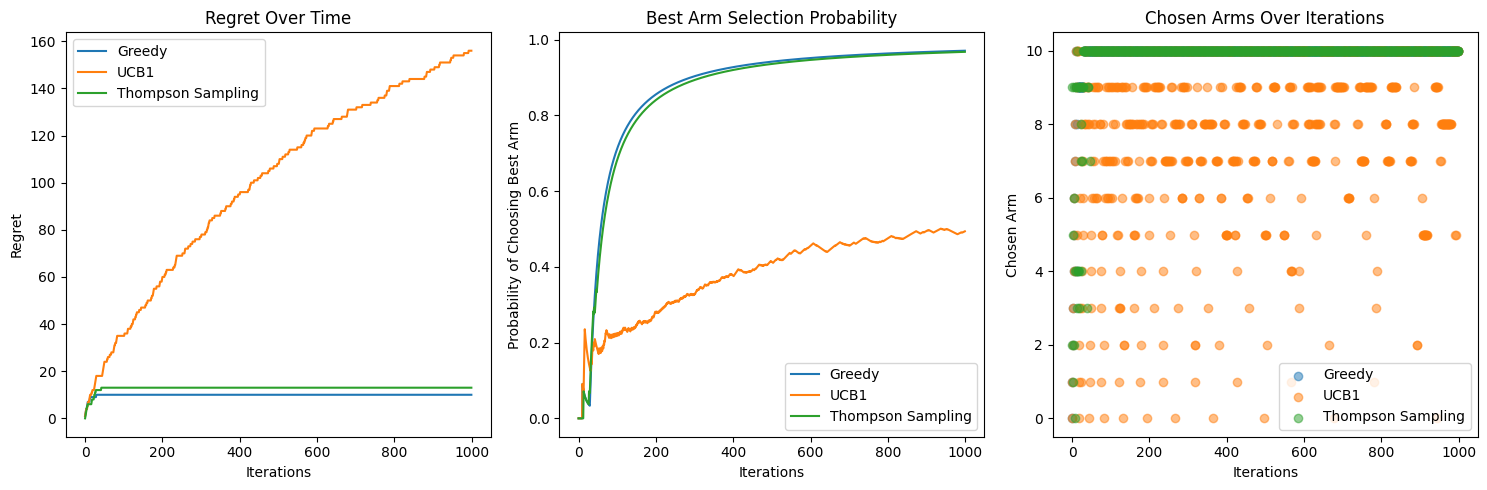

In [8]:
import numpy as np

# Define a range of probabilities for the Bernoulli bandit arms
probabilities = np.arange(0, 1.1, 0.1)

# Create a Bernoulli bandit instance with specified probabilities
bandit = Bandit(probabilities)

# Set the number of iterations for the simulation
n_iterations = 1000

# Initialize instances of different bandit algorithms
greedy = Greedy(len(probabilities))
ucb1 = UCB1(len(probabilities))
thompson = ThompsonSampling(len(probabilities))

# Simulate each bandit algorithm and store the chosen arms and rewards
chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

# Identify the best arm and calculate the optimal reward at each time step
best_arm = np.argmax(probabilities)
optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

# Calculate cumulative rewards for each algorithm
cumulative_rewards_greedy = np.cumsum(rewards_greedy)
cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
cumulative_rewards_thompson = np.cumsum(rewards_thompson)

# Calculate the regrets for each algorithm
regret_greedy = optimal_rewards - cumulative_rewards_greedy
regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
regret_thompson = optimal_rewards - cumulative_rewards_thompson

# Calculate the probability of choosing the best arm over time for each algorithm
prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

# Call the function to plot graphs with the simulated data
plot_all_graphs(regret_greedy, regret_ucb1, regret_thompson, prob_best_arm_greedy, prob_best_arm_ucb1, prob_best_arm_thompson, n_iterations)

### Multiple Runs

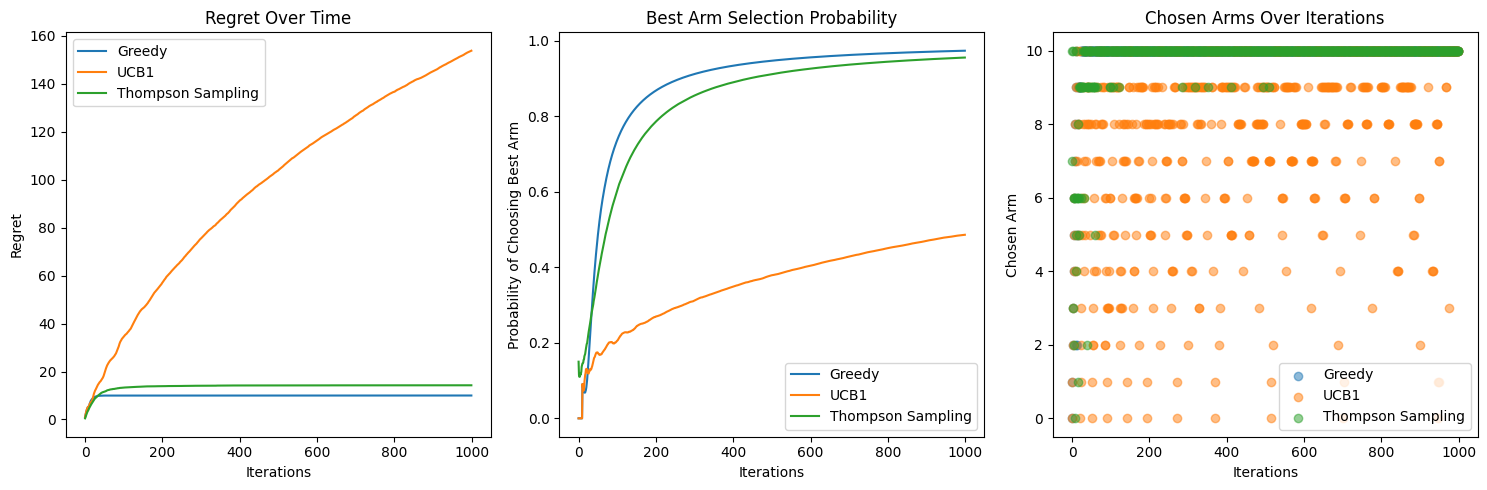

In [9]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = np.arange(0, 1.1, 0.1)
n_iterations = 1000  # Number of iterations per experiment
n_repetitions = 100  # Number of repetitions

# Initialize accumulators for rewards and chosen arms
regrets_greedy_accumulator = np.zeros(n_iterations)
regrets_ucb1_accumulator = np.zeros(n_iterations)
regrets_thompson_accumulator = np.zeros(n_iterations)
prob_best_arm_greedy_accumulator = np.zeros(n_iterations)
prob_best_arms_ucb1_accumulator = np.zeros(n_iterations)
prob_best_arms_thompson_accumulator = np.zeros(n_iterations)

for _ in range(n_repetitions):
    # Create a Bernoulli bandit instance with specified probabilities
    bandit = Bandit(probabilities)

    # Initialize instances of different bandit algorithms
    greedy = Greedy(len(probabilities))
    ucb1 = UCB1(len(probabilities))
    thompson = ThompsonSampling(len(probabilities))

    # Simulate each bandit algorithm and store the chosen arms and rewards
    chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
    chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
    chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

    # Identify the best arm and calculate the optimal reward at each time step
    best_arm = np.argmax(probabilities)
    optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

    # Calculate cumulative rewards for each algorithm
    cumulative_rewards_greedy = np.cumsum(rewards_greedy)
    cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
    cumulative_rewards_thompson = np.cumsum(rewards_thompson)

    # Calculate the regrets for each algorithm
    regret_greedy = optimal_rewards - cumulative_rewards_greedy
    regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
    regret_thompson = optimal_rewards - cumulative_rewards_thompson

    # Calculate the probability of choosing the best arm over time for each algorithm
    prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

    # Accumulate results
    regrets_greedy_accumulator += regret_greedy
    regrets_ucb1_accumulator += regret_ucb1
    regrets_thompson_accumulator += regret_thompson
    prob_best_arm_greedy_accumulator += prob_best_arm_greedy
    prob_best_arms_ucb1_accumulator += prob_best_arm_ucb1
    prob_best_arms_thompson_accumulator += prob_best_arm_thompson

# Averaging over all repetitions
avg_regrets_greedy = regrets_greedy_accumulator / n_repetitions
avg_regrets_ucb1 = regrets_ucb1_accumulator / n_repetitions
avg_regrets_thompson = regrets_thompson_accumulator / n_repetitions
avg_best_arm_greedy = prob_best_arm_greedy_accumulator / n_repetitions
avg_best_arm_ucb1 = prob_best_arms_ucb1_accumulator / n_repetitions
avg_best_arm_thompson = prob_best_arms_thompson_accumulator / n_repetitions

# Call the function with averaged data
plot_all_graphs(avg_regrets_greedy, avg_regrets_ucb1, avg_regrets_thompson, avg_best_arm_greedy, avg_best_arm_ucb1, avg_best_arm_thompson, n_iterations)

## 10,000 time steps

### Single Run

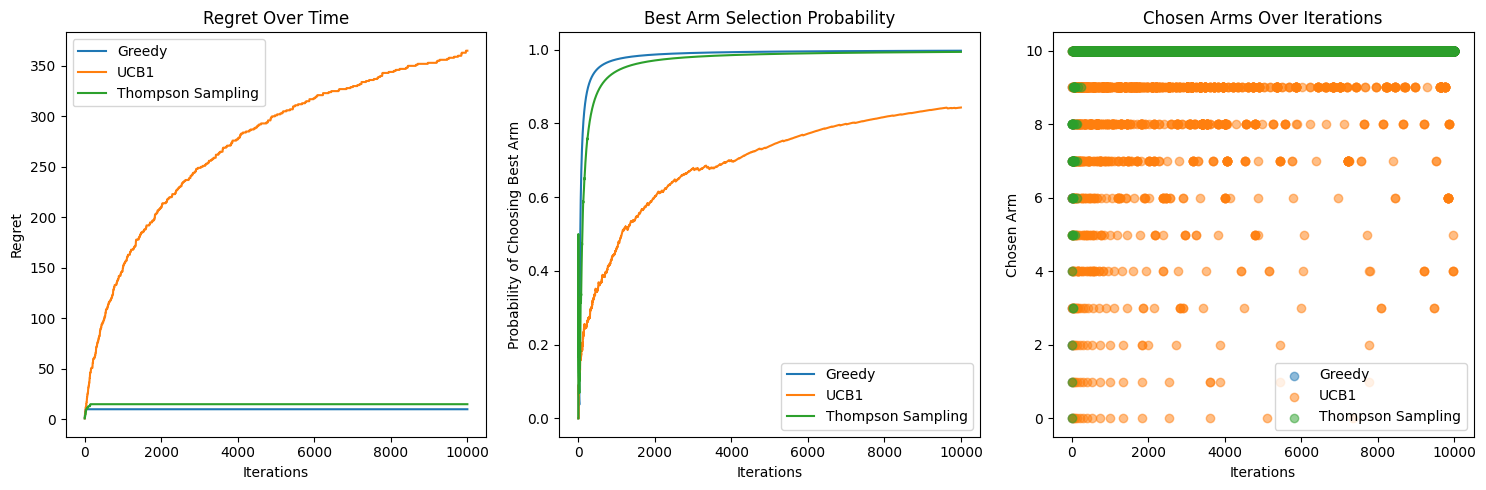

In [11]:
import numpy as np

# Define a range of probabilities for the Bernoulli bandit arms
probabilities = np.arange(0, 1.1, 0.1)

# Create a Bernoulli bandit instance with specified probabilities
bandit = Bandit(probabilities)

# Set the number of iterations for the simulation
n_iterations = 10000

# Initialize instances of different bandit algorithms
greedy = Greedy(len(probabilities))
ucb1 = UCB1(len(probabilities))
thompson = ThompsonSampling(len(probabilities))

# Simulate each bandit algorithm and store the chosen arms and rewards
chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

# Identify the best arm and calculate the optimal reward at each time step
best_arm = np.argmax(probabilities)
optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

# Calculate cumulative rewards for each algorithm
cumulative_rewards_greedy = np.cumsum(rewards_greedy)
cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
cumulative_rewards_thompson = np.cumsum(rewards_thompson)

# Calculate the regrets for each algorithm
regret_greedy = optimal_rewards - cumulative_rewards_greedy
regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
regret_thompson = optimal_rewards - cumulative_rewards_thompson

# Calculate the probability of choosing the best arm over time for each algorithm
prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

# Call the function to plot graphs with the simulated data
plot_all_graphs(regret_greedy, regret_ucb1, regret_thompson, prob_best_arm_greedy, prob_best_arm_ucb1, prob_best_arm_thompson, n_iterations)

### Multiple Runs

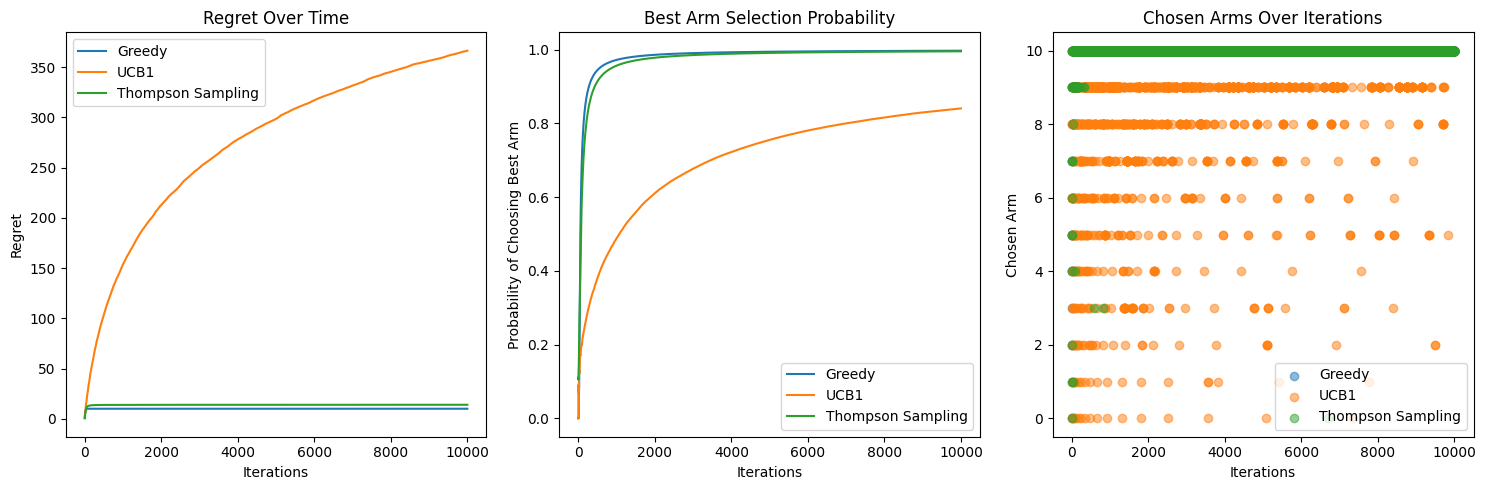

In [12]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = np.arange(0, 1.1, 0.1)
n_iterations = 10000  # Number of iterations per experiment
n_repetitions = 100  # Number of repetitions

# Initialize accumulators for rewards and chosen arms
regrets_greedy_accumulator = np.zeros(n_iterations)
regrets_ucb1_accumulator = np.zeros(n_iterations)
regrets_thompson_accumulator = np.zeros(n_iterations)
prob_best_arm_greedy_accumulator = np.zeros(n_iterations)
prob_best_arms_ucb1_accumulator = np.zeros(n_iterations)
prob_best_arms_thompson_accumulator = np.zeros(n_iterations)

for _ in range(n_repetitions):
    # Create a Bernoulli bandit instance with specified probabilities
    bandit = Bandit(probabilities)

    # Initialize instances of different bandit algorithms
    greedy = Greedy(len(probabilities))
    ucb1 = UCB1(len(probabilities))
    thompson = ThompsonSampling(len(probabilities))

    # Simulate each bandit algorithm and store the chosen arms and rewards
    chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
    chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
    chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

    # Identify the best arm and calculate the optimal reward at each time step
    best_arm = np.argmax(probabilities)
    optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

    # Calculate cumulative rewards for each algorithm
    cumulative_rewards_greedy = np.cumsum(rewards_greedy)
    cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
    cumulative_rewards_thompson = np.cumsum(rewards_thompson)

    # Calculate the regrets for each algorithm
    regret_greedy = optimal_rewards - cumulative_rewards_greedy
    regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
    regret_thompson = optimal_rewards - cumulative_rewards_thompson

    # Calculate the probability of choosing the best arm over time for each algorithm
    prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

    # Accumulate results
    regrets_greedy_accumulator += regret_greedy
    regrets_ucb1_accumulator += regret_ucb1
    regrets_thompson_accumulator += regret_thompson
    prob_best_arm_greedy_accumulator += prob_best_arm_greedy
    prob_best_arms_ucb1_accumulator += prob_best_arm_ucb1
    prob_best_arms_thompson_accumulator += prob_best_arm_thompson

# Averaging over all repetitions
avg_regrets_greedy = regrets_greedy_accumulator / n_repetitions
avg_regrets_ucb1 = regrets_ucb1_accumulator / n_repetitions
avg_regrets_thompson = regrets_thompson_accumulator / n_repetitions
avg_best_arm_greedy = prob_best_arm_greedy_accumulator / n_repetitions
avg_best_arm_ucb1 = prob_best_arms_ucb1_accumulator / n_repetitions
avg_best_arm_thompson = prob_best_arms_thompson_accumulator / n_repetitions

# Call the function with averaged data
plot_all_graphs(avg_regrets_greedy, avg_regrets_ucb1, avg_regrets_thompson, avg_best_arm_greedy, avg_best_arm_ucb1, avg_best_arm_thompson, n_iterations)

## 100,000 time steps

### Single Run

<ipython-input-2-6ac11cfde6c6>:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


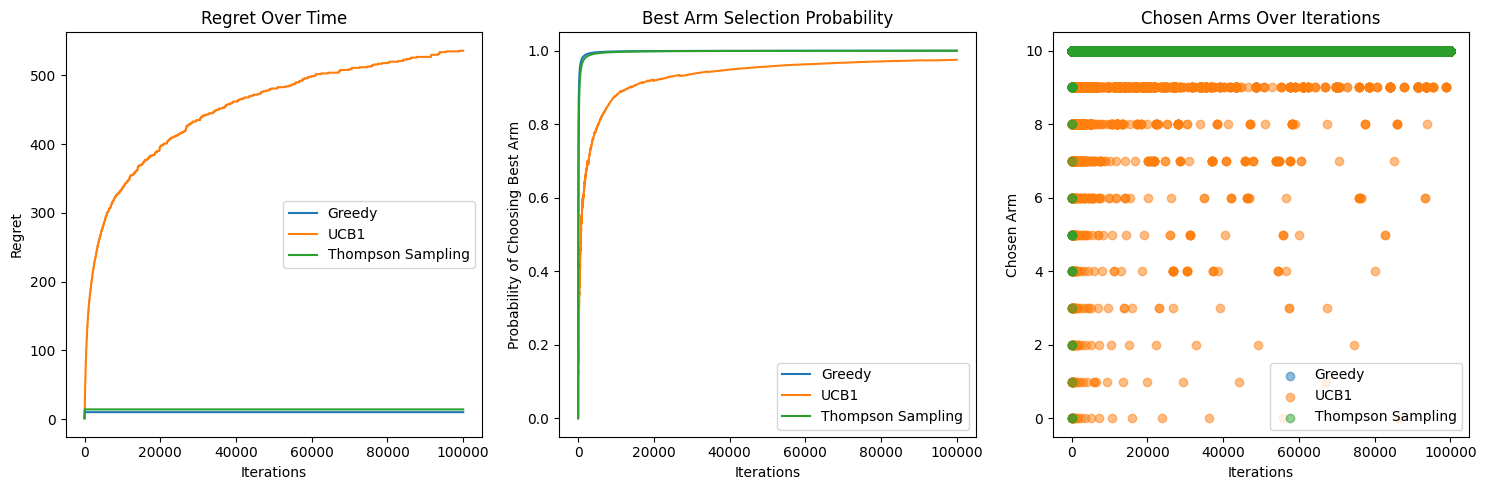

In [13]:
import numpy as np

# Define a range of probabilities for the Bernoulli bandit arms
probabilities = np.arange(0, 1.1, 0.1)

# Create a Bernoulli bandit instance with specified probabilities
bandit = Bandit(probabilities)

# Set the number of iterations for the simulation
n_iterations = 100000

# Initialize instances of different bandit algorithms
greedy = Greedy(len(probabilities))
ucb1 = UCB1(len(probabilities))
thompson = ThompsonSampling(len(probabilities))

# Simulate each bandit algorithm and store the chosen arms and rewards
chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

# Identify the best arm and calculate the optimal reward at each time step
best_arm = np.argmax(probabilities)
optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

# Calculate cumulative rewards for each algorithm
cumulative_rewards_greedy = np.cumsum(rewards_greedy)
cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
cumulative_rewards_thompson = np.cumsum(rewards_thompson)

# Calculate the regrets for each algorithm
regret_greedy = optimal_rewards - cumulative_rewards_greedy
regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
regret_thompson = optimal_rewards - cumulative_rewards_thompson

# Calculate the probability of choosing the best arm over time for each algorithm
prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

# Call the function to plot graphs with the simulated data
plot_all_graphs(regret_greedy, regret_ucb1, regret_thompson, prob_best_arm_greedy, prob_best_arm_ucb1, prob_best_arm_thompson, n_iterations)

### Multiple Runs

<ipython-input-2-6ac11cfde6c6>:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


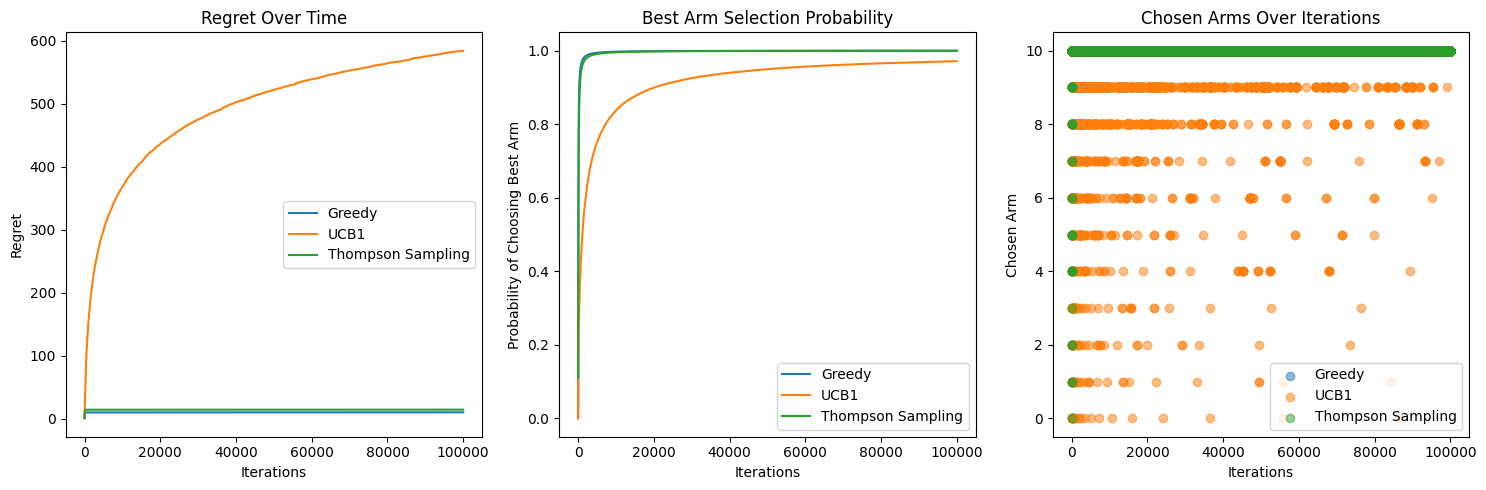

In [14]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = np.arange(0, 1.1, 0.1)
n_iterations = 100000  # Number of iterations per experiment
n_repetitions = 100  # Number of repetitions

# Initialize accumulators for rewards and chosen arms
regrets_greedy_accumulator = np.zeros(n_iterations)
regrets_ucb1_accumulator = np.zeros(n_iterations)
regrets_thompson_accumulator = np.zeros(n_iterations)
prob_best_arm_greedy_accumulator = np.zeros(n_iterations)
prob_best_arms_ucb1_accumulator = np.zeros(n_iterations)
prob_best_arms_thompson_accumulator = np.zeros(n_iterations)

for _ in range(n_repetitions):
    # Create a Bernoulli bandit instance with specified probabilities
    bandit = Bandit(probabilities)

    # Initialize instances of different bandit algorithms
    greedy = Greedy(len(probabilities))
    ucb1 = UCB1(len(probabilities))
    thompson = ThompsonSampling(len(probabilities))

    # Simulate each bandit algorithm and store the chosen arms and rewards
    chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
    chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
    chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

    # Identify the best arm and calculate the optimal reward at each time step
    best_arm = np.argmax(probabilities)
    optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

    # Calculate cumulative rewards for each algorithm
    cumulative_rewards_greedy = np.cumsum(rewards_greedy)
    cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
    cumulative_rewards_thompson = np.cumsum(rewards_thompson)

    # Calculate the regrets for each algorithm
    regret_greedy = optimal_rewards - cumulative_rewards_greedy
    regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
    regret_thompson = optimal_rewards - cumulative_rewards_thompson

    # Calculate the probability of choosing the best arm over time for each algorithm
    prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

    # Accumulate results
    regrets_greedy_accumulator += regret_greedy
    regrets_ucb1_accumulator += regret_ucb1
    regrets_thompson_accumulator += regret_thompson
    prob_best_arm_greedy_accumulator += prob_best_arm_greedy
    prob_best_arms_ucb1_accumulator += prob_best_arm_ucb1
    prob_best_arms_thompson_accumulator += prob_best_arm_thompson

# Averaging over all repetitions
avg_regrets_greedy = regrets_greedy_accumulator / n_repetitions
avg_regrets_ucb1 = regrets_ucb1_accumulator / n_repetitions
avg_regrets_thompson = regrets_thompson_accumulator / n_repetitions
avg_best_arm_greedy = prob_best_arm_greedy_accumulator / n_repetitions
avg_best_arm_ucb1 = prob_best_arms_ucb1_accumulator / n_repetitions
avg_best_arm_thompson = prob_best_arms_thompson_accumulator / n_repetitions

# Call the function with averaged data
plot_all_graphs(avg_regrets_greedy, avg_regrets_ucb1, avg_regrets_thompson, avg_best_arm_greedy, avg_best_arm_ucb1, avg_best_arm_thompson, n_iterations)

# Test case 2: Five-armed bandit with probabilities 0.3, 0.5, 0.7, 0.83, 0.85

## 1,000 time steps

### Single Run

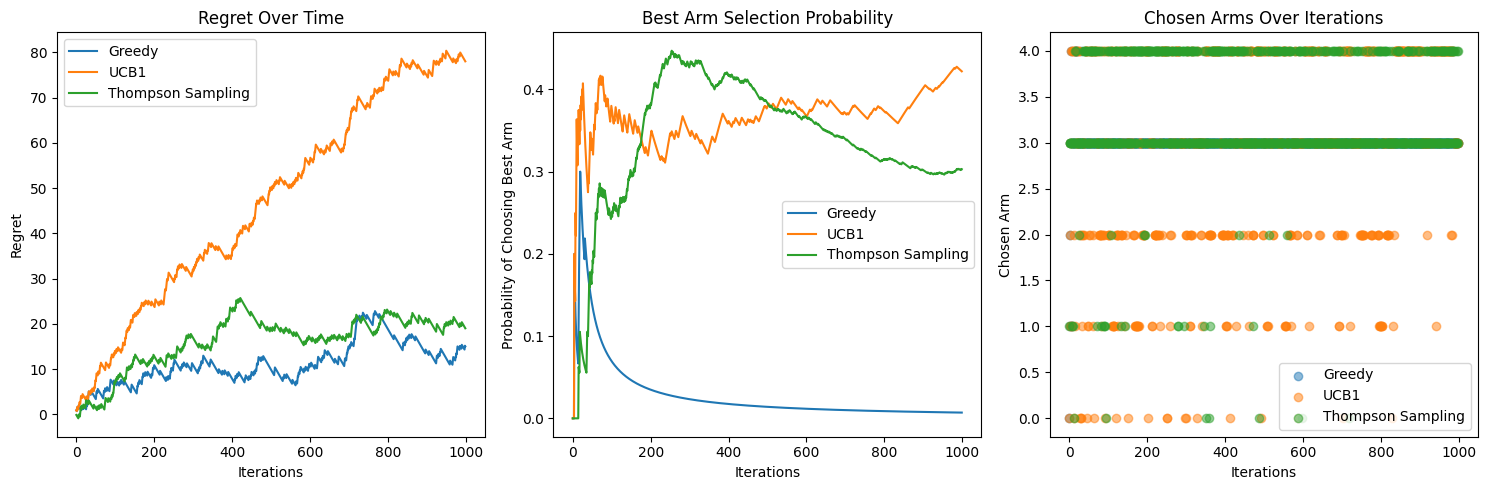

In [15]:
import numpy as np

probabilities = np.array([0.3, 0.5, 0.7, 0.83, 0.85])

# Create a Bernoulli bandit instance with specified probabilities
bandit = Bandit(probabilities)

# Set the number of iterations for the simulation
n_iterations = 1000

# Initialize instances of different bandit algorithms
greedy = Greedy(len(probabilities))
ucb1 = UCB1(len(probabilities))
thompson = ThompsonSampling(len(probabilities))

# Simulate each bandit algorithm and store the chosen arms and rewards
chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

# Identify the best arm and calculate the optimal reward at each time step
best_arm = np.argmax(probabilities)
optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

# Calculate cumulative rewards for each algorithm
cumulative_rewards_greedy = np.cumsum(rewards_greedy)
cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
cumulative_rewards_thompson = np.cumsum(rewards_thompson)

# Calculate the regrets for each algorithm
regret_greedy = optimal_rewards - cumulative_rewards_greedy
regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
regret_thompson = optimal_rewards - cumulative_rewards_thompson

# Calculate the probability of choosing the best arm over time for each algorithm
prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

# Call the function to plot graphs with the simulated data
plot_all_graphs(regret_greedy, regret_ucb1, regret_thompson, prob_best_arm_greedy, prob_best_arm_ucb1, prob_best_arm_thompson, n_iterations)

### Multiple Runs

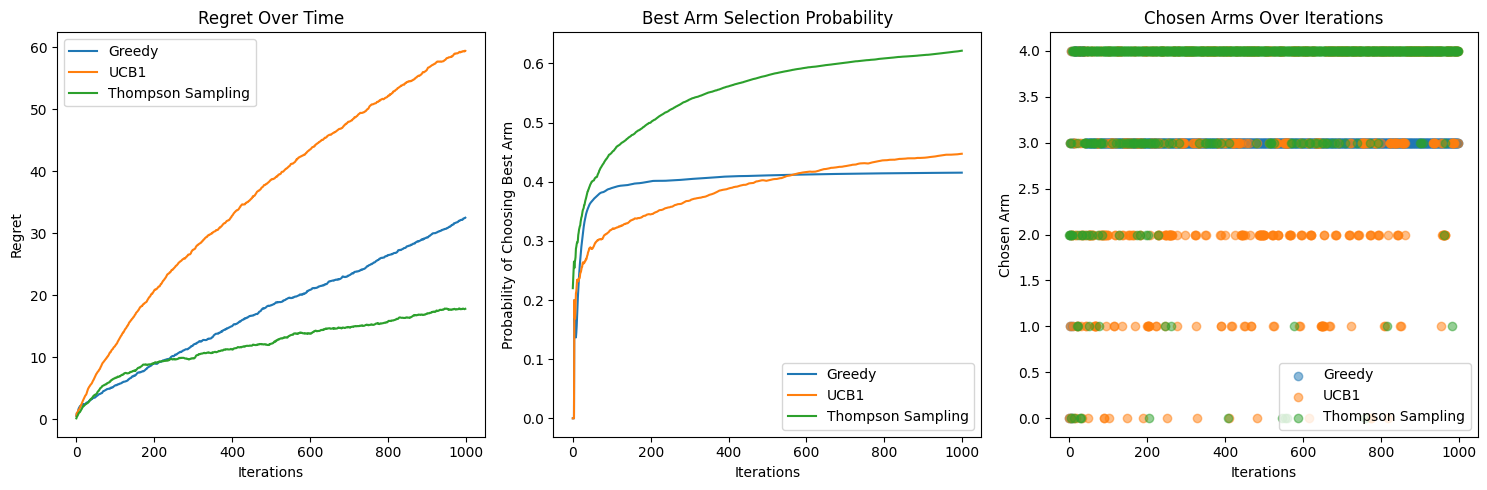

In [21]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = np.array([0.3, 0.5, 0.7, 0.83, 0.85])
n_iterations = 1000  # Number of iterations per experiment
n_repetitions = 100  # Number of repetitions

# Initialize accumulators for rewards and chosen arms
regrets_greedy_accumulator = np.zeros(n_iterations)
regrets_ucb1_accumulator = np.zeros(n_iterations)
regrets_thompson_accumulator = np.zeros(n_iterations)
prob_best_arm_greedy_accumulator = np.zeros(n_iterations)
prob_best_arms_ucb1_accumulator = np.zeros(n_iterations)
prob_best_arms_thompson_accumulator = np.zeros(n_iterations)

for _ in range(n_repetitions):
    # Create a Bernoulli bandit instance with specified probabilities
    bandit = Bandit(probabilities)

    # Initialize instances of different bandit algorithms
    greedy = Greedy(len(probabilities))
    ucb1 = UCB1(len(probabilities))
    thompson = ThompsonSampling(len(probabilities))

    # Simulate each bandit algorithm and store the chosen arms and rewards
    chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
    chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
    chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

    # Identify the best arm and calculate the optimal reward at each time step
    best_arm = np.argmax(probabilities)
    optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

    # Calculate cumulative rewards for each algorithm
    cumulative_rewards_greedy = np.cumsum(rewards_greedy)
    cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
    cumulative_rewards_thompson = np.cumsum(rewards_thompson)

    # Calculate the regrets for each algorithm
    regret_greedy = optimal_rewards - cumulative_rewards_greedy
    regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
    regret_thompson = optimal_rewards - cumulative_rewards_thompson

    # Calculate the probability of choosing the best arm over time for each algorithm
    prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

    # Accumulate results
    regrets_greedy_accumulator += regret_greedy
    regrets_ucb1_accumulator += regret_ucb1
    regrets_thompson_accumulator += regret_thompson
    prob_best_arm_greedy_accumulator += prob_best_arm_greedy
    prob_best_arms_ucb1_accumulator += prob_best_arm_ucb1
    prob_best_arms_thompson_accumulator += prob_best_arm_thompson

# Averaging over all repetitions
avg_regrets_greedy = regrets_greedy_accumulator / n_repetitions
avg_regrets_ucb1 = regrets_ucb1_accumulator / n_repetitions
avg_regrets_thompson = regrets_thompson_accumulator / n_repetitions
avg_best_arm_greedy = prob_best_arm_greedy_accumulator / n_repetitions
avg_best_arm_ucb1 = prob_best_arms_ucb1_accumulator / n_repetitions
avg_best_arm_thompson = prob_best_arms_thompson_accumulator / n_repetitions

# Call the function with averaged data
plot_all_graphs(avg_regrets_greedy, avg_regrets_ucb1, avg_regrets_thompson, avg_best_arm_greedy, avg_best_arm_ucb1, avg_best_arm_thompson, n_iterations)

## 10,000 time steps

### Single Run

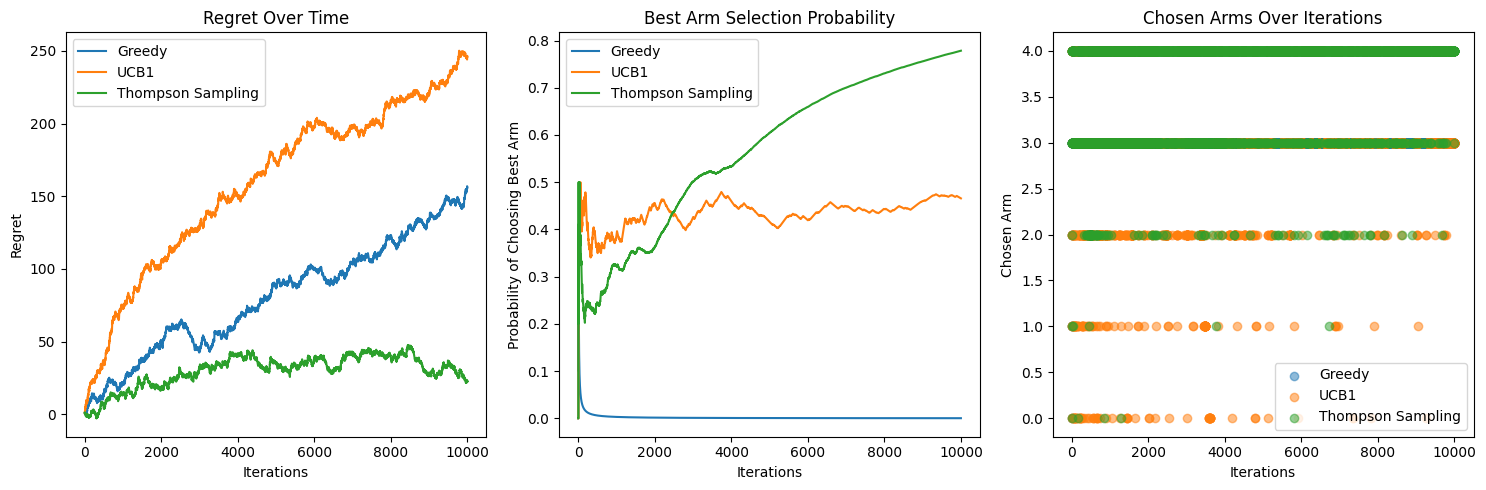

In [17]:
import numpy as np

probabilities = np.array([0.3, 0.5, 0.7, 0.83, 0.85])

# Create a Bernoulli bandit instance with specified probabilities
bandit = Bandit(probabilities)

# Set the number of iterations for the simulation
n_iterations = 10000

# Initialize instances of different bandit algorithms
greedy = Greedy(len(probabilities))
ucb1 = UCB1(len(probabilities))
thompson = ThompsonSampling(len(probabilities))

# Simulate each bandit algorithm and store the chosen arms and rewards
chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

# Identify the best arm and calculate the optimal reward at each time step
best_arm = np.argmax(probabilities)
optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

# Calculate cumulative rewards for each algorithm
cumulative_rewards_greedy = np.cumsum(rewards_greedy)
cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
cumulative_rewards_thompson = np.cumsum(rewards_thompson)

# Calculate the regrets for each algorithm
regret_greedy = optimal_rewards - cumulative_rewards_greedy
regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
regret_thompson = optimal_rewards - cumulative_rewards_thompson

# Calculate the probability of choosing the best arm over time for each algorithm
prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

# Call the function to plot graphs with the simulated data
plot_all_graphs(regret_greedy, regret_ucb1, regret_thompson, prob_best_arm_greedy, prob_best_arm_ucb1, prob_best_arm_thompson, n_iterations)

### Multiple runs

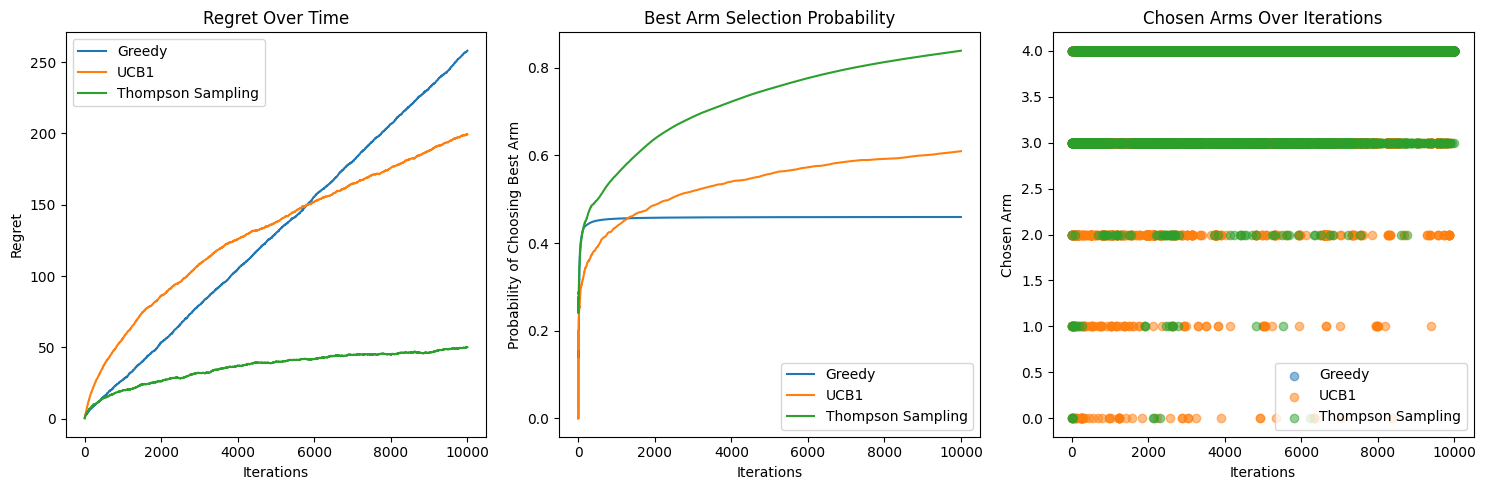

In [22]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = np.array([0.3, 0.5, 0.7, 0.83, 0.85])
n_iterations = 10000  # Number of iterations per experiment
n_repetitions = 100  # Number of repetitions

# Initialize accumulators for rewards and chosen arms
regrets_greedy_accumulator = np.zeros(n_iterations)
regrets_ucb1_accumulator = np.zeros(n_iterations)
regrets_thompson_accumulator = np.zeros(n_iterations)
prob_best_arm_greedy_accumulator = np.zeros(n_iterations)
prob_best_arms_ucb1_accumulator = np.zeros(n_iterations)
prob_best_arms_thompson_accumulator = np.zeros(n_iterations)

for _ in range(n_repetitions):
    # Create a Bernoulli bandit instance with specified probabilities
    bandit = Bandit(probabilities)

    # Initialize instances of different bandit algorithms
    greedy = Greedy(len(probabilities))
    ucb1 = UCB1(len(probabilities))
    thompson = ThompsonSampling(len(probabilities))

    # Simulate each bandit algorithm and store the chosen arms and rewards
    chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
    chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
    chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

    # Identify the best arm and calculate the optimal reward at each time step
    best_arm = np.argmax(probabilities)
    optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

    # Calculate cumulative rewards for each algorithm
    cumulative_rewards_greedy = np.cumsum(rewards_greedy)
    cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
    cumulative_rewards_thompson = np.cumsum(rewards_thompson)

    # Calculate the regrets for each algorithm
    regret_greedy = optimal_rewards - cumulative_rewards_greedy
    regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
    regret_thompson = optimal_rewards - cumulative_rewards_thompson

    # Calculate the probability of choosing the best arm over time for each algorithm
    prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

    # Accumulate results
    regrets_greedy_accumulator += regret_greedy
    regrets_ucb1_accumulator += regret_ucb1
    regrets_thompson_accumulator += regret_thompson
    prob_best_arm_greedy_accumulator += prob_best_arm_greedy
    prob_best_arms_ucb1_accumulator += prob_best_arm_ucb1
    prob_best_arms_thompson_accumulator += prob_best_arm_thompson

# Averaging over all repetitions
avg_regrets_greedy = regrets_greedy_accumulator / n_repetitions
avg_regrets_ucb1 = regrets_ucb1_accumulator / n_repetitions
avg_regrets_thompson = regrets_thompson_accumulator / n_repetitions
avg_best_arm_greedy = prob_best_arm_greedy_accumulator / n_repetitions
avg_best_arm_ucb1 = prob_best_arms_ucb1_accumulator / n_repetitions
avg_best_arm_thompson = prob_best_arms_thompson_accumulator / n_repetitions

# Call the function with averaged data
plot_all_graphs(avg_regrets_greedy, avg_regrets_ucb1, avg_regrets_thompson, avg_best_arm_greedy, avg_best_arm_ucb1, avg_best_arm_thompson, n_iterations)

## 100,000 time steps

### Single Run

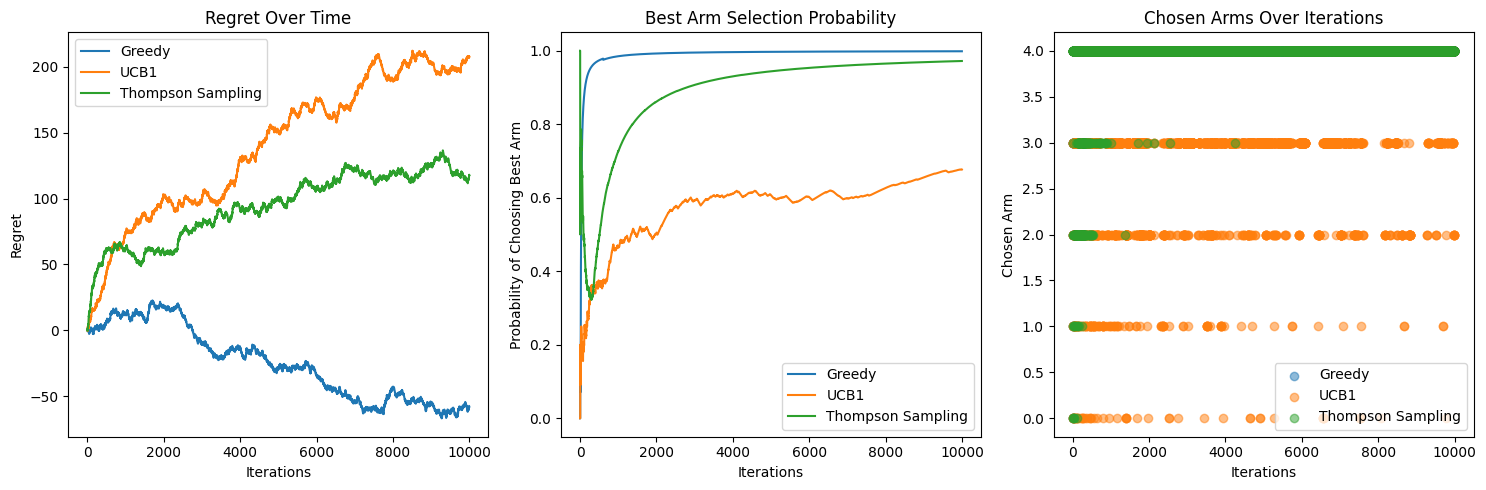

In [19]:
import numpy as np

probabilities = np.array([0.3, 0.5, 0.7, 0.83, 0.85])

# Create a Bernoulli bandit instance with specified probabilities
bandit = Bandit(probabilities)

# Set the number of iterations for the simulation
n_iterations = 10000

# Initialize instances of different bandit algorithms
greedy = Greedy(len(probabilities))
ucb1 = UCB1(len(probabilities))
thompson = ThompsonSampling(len(probabilities))

# Simulate each bandit algorithm and store the chosen arms and rewards
chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

# Identify the best arm and calculate the optimal reward at each time step
best_arm = np.argmax(probabilities)
optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

# Calculate cumulative rewards for each algorithm
cumulative_rewards_greedy = np.cumsum(rewards_greedy)
cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
cumulative_rewards_thompson = np.cumsum(rewards_thompson)

# Calculate the regrets for each algorithm
regret_greedy = optimal_rewards - cumulative_rewards_greedy
regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
regret_thompson = optimal_rewards - cumulative_rewards_thompson

# Calculate the probability of choosing the best arm over time for each algorithm
prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

# Call the function to plot graphs with the simulated data
plot_all_graphs(regret_greedy, regret_ucb1, regret_thompson, prob_best_arm_greedy, prob_best_arm_ucb1, prob_best_arm_thompson, n_iterations)

### Multiple Runs

<ipython-input-2-6ac11cfde6c6>:39: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


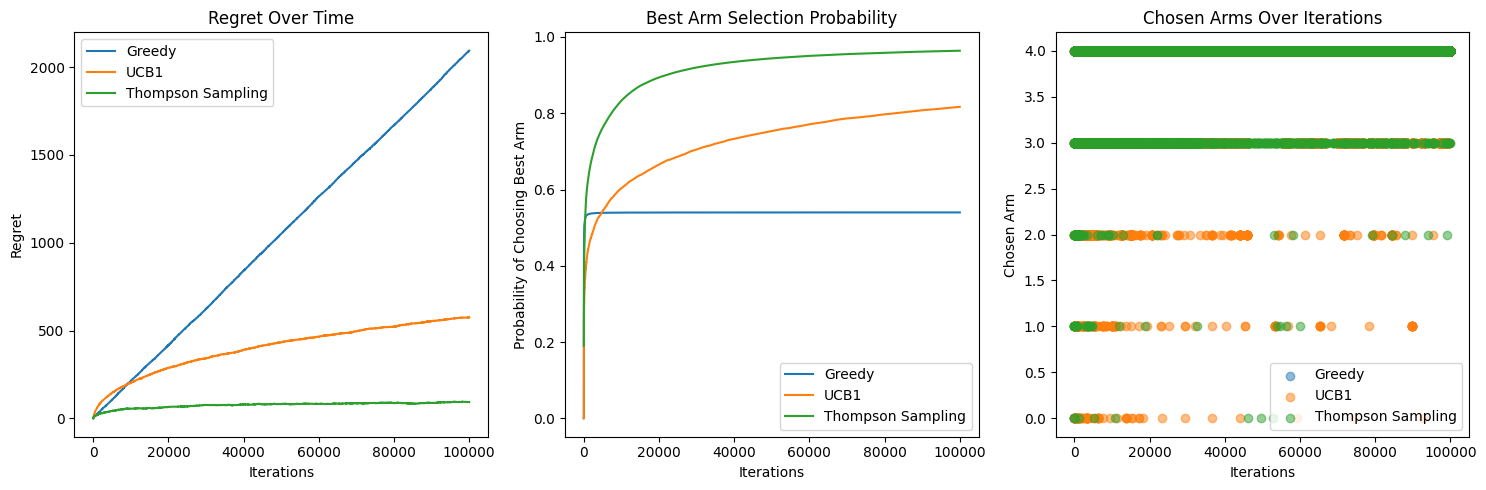

In [23]:
import numpy as np
import matplotlib.pyplot as plt

probabilities = np.array([0.3, 0.5, 0.7, 0.83, 0.85])
n_iterations = 100000  # Number of iterations per experiment
n_repetitions = 100  # Number of repetitions

# Initialize accumulators for rewards and chosen arms
regrets_greedy_accumulator = np.zeros(n_iterations)
regrets_ucb1_accumulator = np.zeros(n_iterations)
regrets_thompson_accumulator = np.zeros(n_iterations)
prob_best_arm_greedy_accumulator = np.zeros(n_iterations)
prob_best_arms_ucb1_accumulator = np.zeros(n_iterations)
prob_best_arms_thompson_accumulator = np.zeros(n_iterations)

for _ in range(n_repetitions):
    # Create a Bernoulli bandit instance with specified probabilities
    bandit = Bandit(probabilities)

    # Initialize instances of different bandit algorithms
    greedy = Greedy(len(probabilities))
    ucb1 = UCB1(len(probabilities))
    thompson = ThompsonSampling(len(probabilities))

    # Simulate each bandit algorithm and store the chosen arms and rewards
    chosen_arms_greedy, rewards_greedy = simulate(bandit, greedy, n_iterations)
    chosen_arms_ucb1, rewards_ucb1 = simulate(bandit, ucb1, n_iterations)
    chosen_arms_thompson, rewards_thompson = simulate(bandit, thompson, n_iterations)

    # Identify the best arm and calculate the optimal reward at each time step
    best_arm = np.argmax(probabilities)
    optimal_rewards = np.cumsum([probabilities[best_arm]] * n_iterations)

    # Calculate cumulative rewards for each algorithm
    cumulative_rewards_greedy = np.cumsum(rewards_greedy)
    cumulative_rewards_ucb1 = np.cumsum(rewards_ucb1)
    cumulative_rewards_thompson = np.cumsum(rewards_thompson)

    # Calculate the regrets for each algorithm
    regret_greedy = optimal_rewards - cumulative_rewards_greedy
    regret_ucb1 = optimal_rewards - cumulative_rewards_ucb1
    regret_thompson = optimal_rewards - cumulative_rewards_thompson

    # Calculate the probability of choosing the best arm over time for each algorithm
    prob_best_arm_greedy = np.cumsum(chosen_arms_greedy == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_ucb1 = np.cumsum(chosen_arms_ucb1 == best_arm) / (np.arange(n_iterations) + 1)
    prob_best_arm_thompson = np.cumsum(chosen_arms_thompson == best_arm) / (np.arange(n_iterations) + 1)

    # Accumulate results
    regrets_greedy_accumulator += regret_greedy
    regrets_ucb1_accumulator += regret_ucb1
    regrets_thompson_accumulator += regret_thompson
    prob_best_arm_greedy_accumulator += prob_best_arm_greedy
    prob_best_arms_ucb1_accumulator += prob_best_arm_ucb1
    prob_best_arms_thompson_accumulator += prob_best_arm_thompson

# Averaging over all repetitions
avg_regrets_greedy = regrets_greedy_accumulator / n_repetitions
avg_regrets_ucb1 = regrets_ucb1_accumulator / n_repetitions
avg_regrets_thompson = regrets_thompson_accumulator / n_repetitions
avg_best_arm_greedy = prob_best_arm_greedy_accumulator / n_repetitions
avg_best_arm_ucb1 = prob_best_arms_ucb1_accumulator / n_repetitions
avg_best_arm_thompson = prob_best_arms_thompson_accumulator / n_repetitions

# Call the function with averaged data
plot_all_graphs(avg_regrets_greedy, avg_regrets_ucb1, avg_regrets_thompson, avg_best_arm_greedy, avg_best_arm_ucb1, avg_best_arm_thompson, n_iterations)